---
title: "Blog Post: Kernel Logistic Regression"
formet:
  html:
    code-fold: false
jupyter: python3
---

link to kernel_logistic.py: https://github.com/charlotte-zhuang03/github_charlotte-zhuang03.github.io/blob/main/posts/Blog_Post_Kernel_Logistic_Regression/kernel_logistic.py

### Implementation of Logistic Regression with Kernel Function

#### Empirical risk and gradient descent update of weight vector v follows this formula:

$$v^{(t+1)} \leftarrow v^{(t)} - \alpha \nabla L(v^{(t)})$$

1. Compute gradient of the empirical risk for logistic regression $\nabla L(v)$ \
   As shown in blog post instruction, the empirical risk of $L(v)$ is: $$L(v) = \frac{1}{n} * \sum \limits _{i=1} ^{n} l(<v, k(x_i)>,y_i) $$\
   We can then calculate the gradient of empirical risk function, $$\nabla L(v) = \frac{1}{n} * \sum \limits _{i=1} ^{n} (\sigma (<v, k(x_i)>) - y_i)*k(x_i) $$ We can calculate the gradient according to this formula, as illustrated in the empirical_risk and logistic_loss function in the source code.

2. For every step in the updating process: \
    We subtract $\alpha \nabla L(v^{(t)})$ from the current weight vector $ v^{(t)}$ to update the weight vector v until convergence.
    
#### Loss history update follows this formula:

$$ l(\hat{y}, y) = -ylog\sigma(\hat{y}) - (1-y)log(1-\sigma(\hat{y})) $$

where

$$\hat{y} = <\hat{v}, k(x)> $$

$$ \sigma (\hat{y}) = \frac{1}{1+e^{-\hat{y}}} $$

$\hat{v}$ refers to the optimal $\hat{v}$ obtained from training the model, and can be used to make prediction about $\hat{y}$.

We just need to compute the average value of the loss function and append them to the loss_history list.


### Check and Experiments

#### Basic Check

0.88


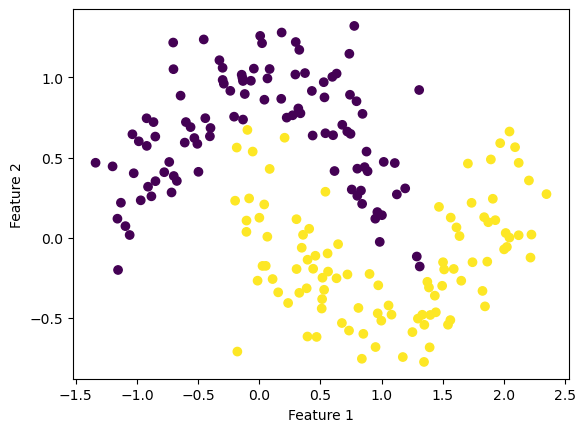

In [3]:
from kernel_logistic import KernelLogisticRegression # your source code
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


import numpy as np
from matplotlib import pyplot as plt
np.seterr(all="ignore")

X, y = make_moons(200, shuffle = True, noise = 0.2)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")
KLR = KernelLogisticRegression(rbf_kernel, gamma = .1)
KLR.fit(X, y)
print(KLR.score(X, y))

#### Choosing Gamma

1.0


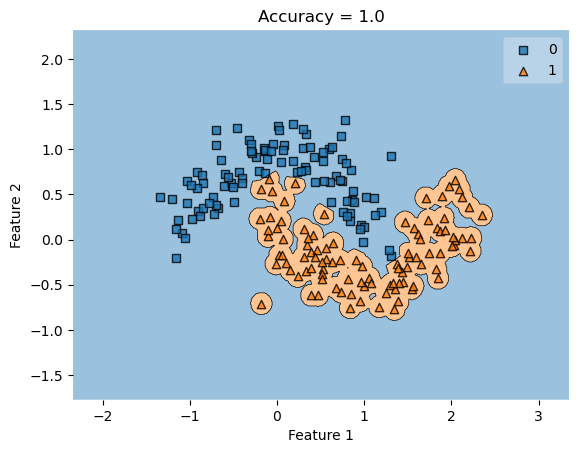

In [4]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 50000)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

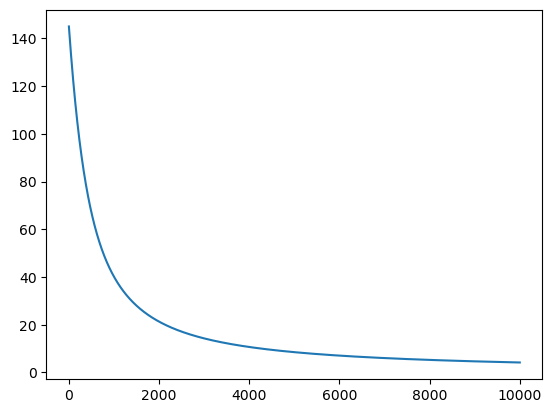

In [5]:
plt.plot(KLR.loss_history)

#### Generating some new data and see the performance

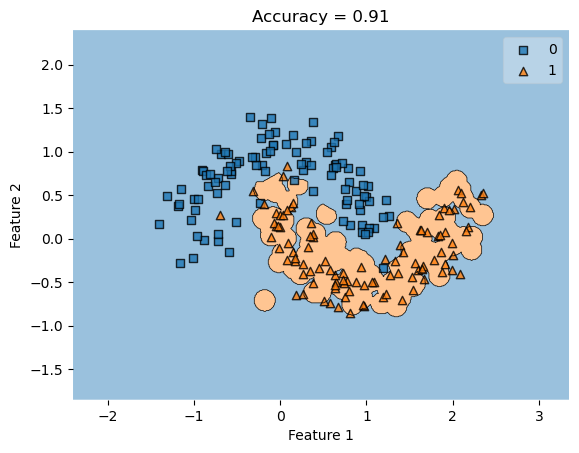

In [6]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

It can be seen from the above figure that the accuracy of the model decreases from 1.0 to 0.875, and the little orange blobs were not around each orange data point, indicating a worse performance. We say that the validation or testing accuracy of the classifier is quite low, and the model is overfitting.

#### Varying Gamma

##### Experiment 1: Gamma = 10

0.995


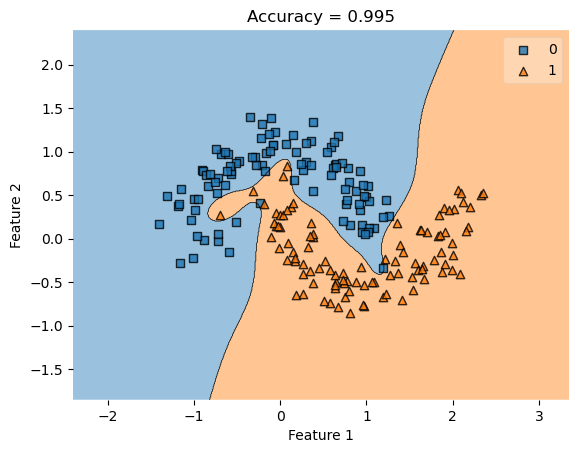

In [7]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

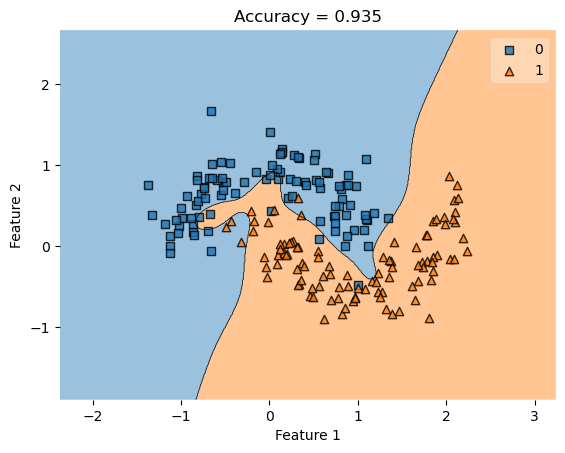

In [8]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 2: Gamma = 1000

1.0


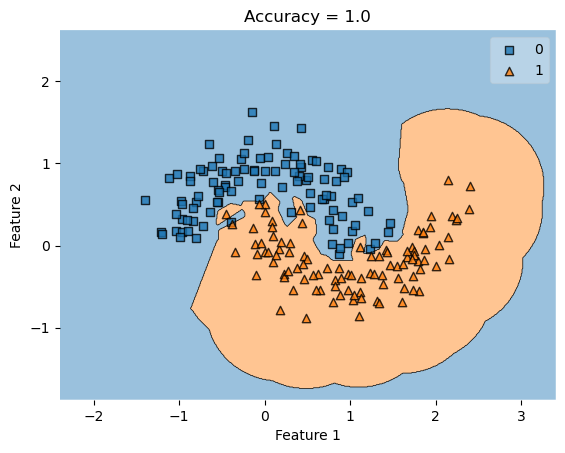

In [14]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 1000)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

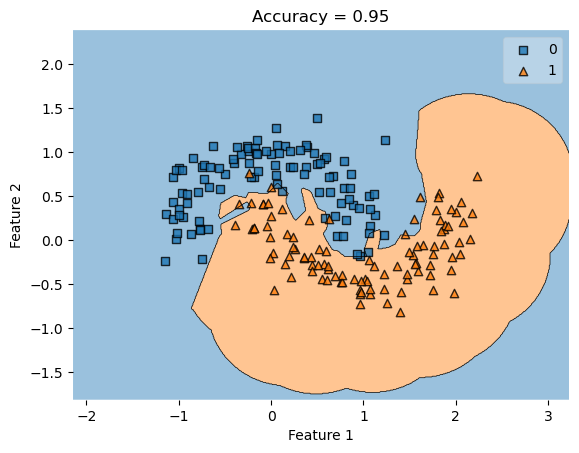

In [15]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 3: Gamma = 10000

1.0


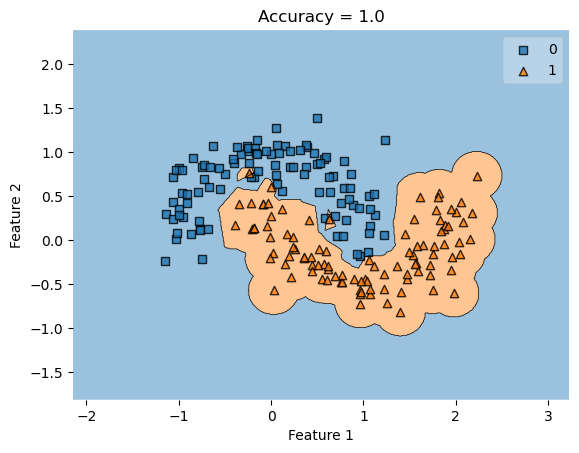

In [16]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10000)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

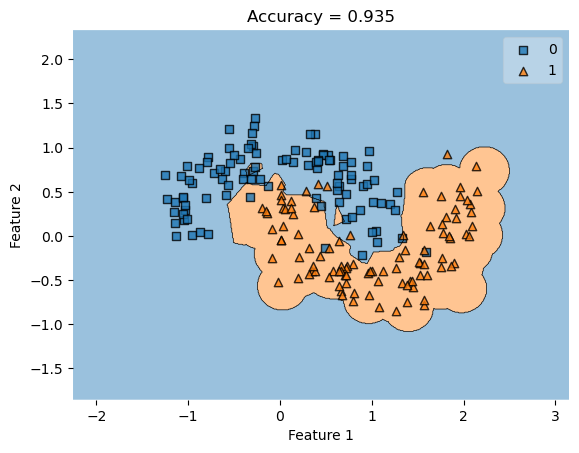

In [17]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 4: Gamma = 100000

1.0


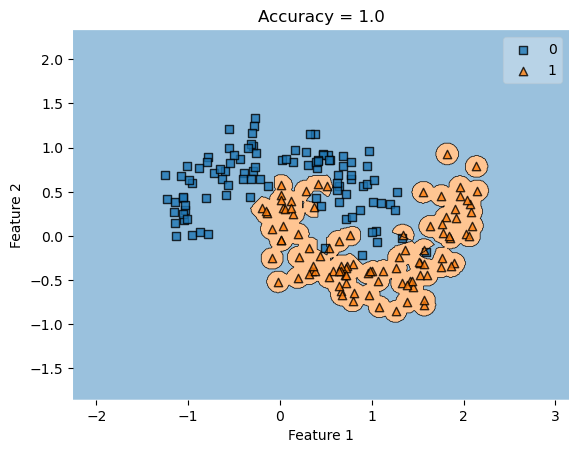

In [18]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 50000)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

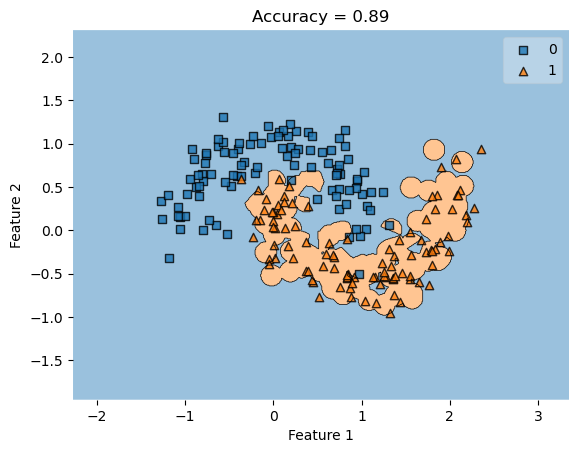

In [19]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

In general, from the experiments with different gamma, there seems to be a pattern that with higher gamma, the model fits the data in more detailed manner, therefore higher gamma has greater probability of causing overfitting.

#### Varying the Noise

1.0


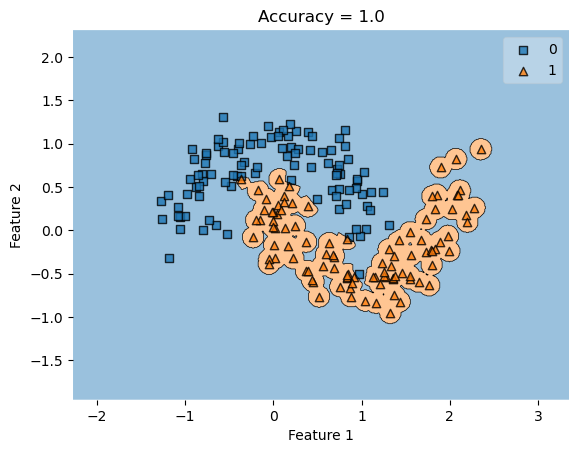

In [20]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 50000)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 5: noise = 0.1

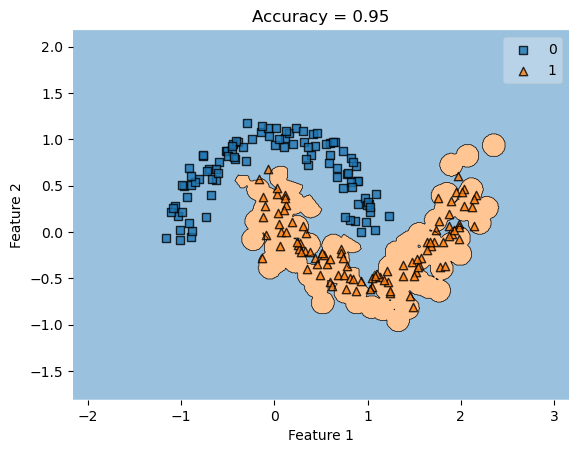

In [21]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.1)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 6: noise = 0.5

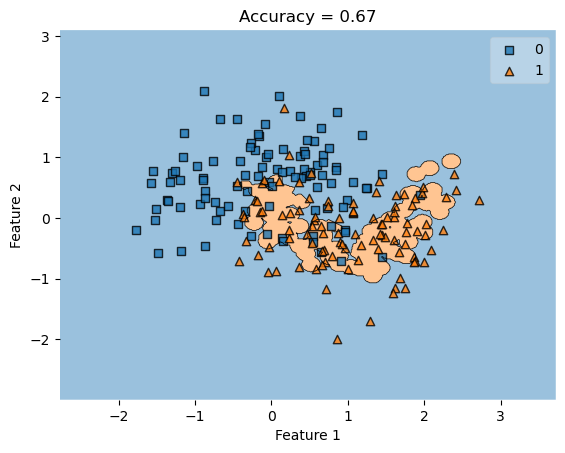

In [22]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.5)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### Experiment 7: noise = 0.8

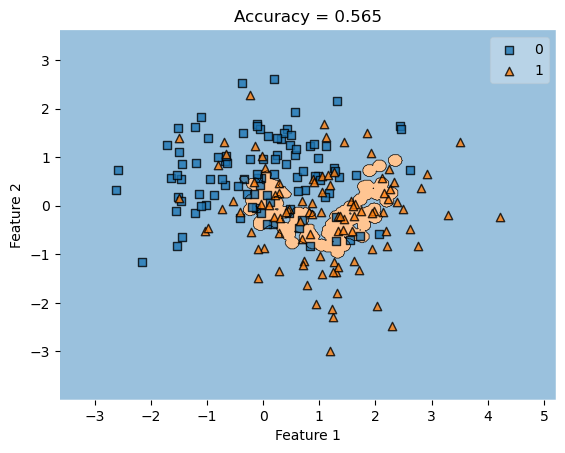

In [23]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.8)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

We can see from the above graph that as noise increases, the data spreads in a more random way. Data with different labels almost mixed together in this plot, therefore leading to a lower accuracy in predicting. Higher gamma tends to overfit, therefore when the noise is high, it is better to use a model with lower gamma to avoid overfitting.

#### Make circles

##### noise = 0.05

0.5


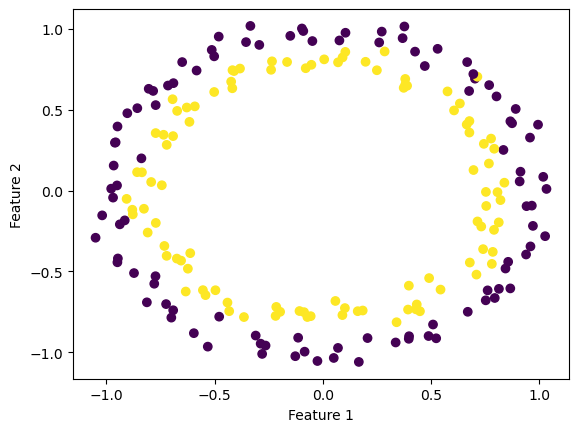

In [36]:
X, y = make_circles(200, shuffle = True, noise = 0.05)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")
KLR = KernelLogisticRegression(rbf_kernel, gamma = .1)
KLR.fit(X, y)
print(KLR.score(X, y))

0.995


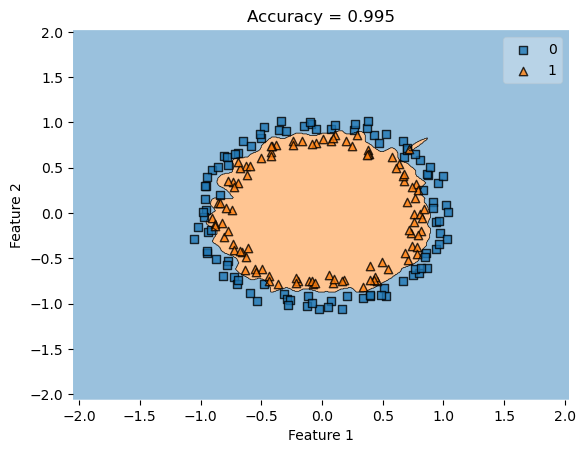

In [37]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 500)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### noise = 0.2

0.5


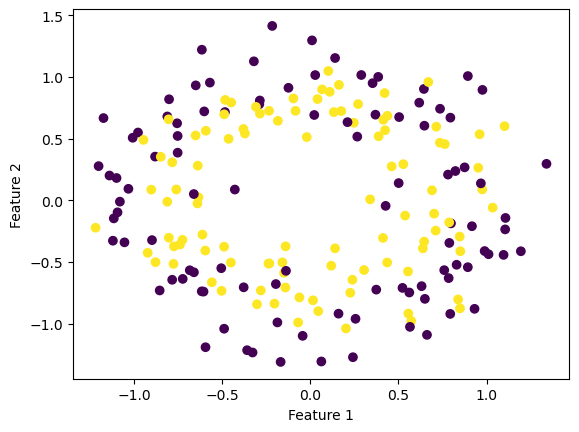

In [38]:
X, y = make_circles(200, shuffle = True, noise = 0.2)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")
KLR = KernelLogisticRegression(rbf_kernel, gamma = .2)
KLR.fit(X, y)
print(KLR.score(X, y))

1.0


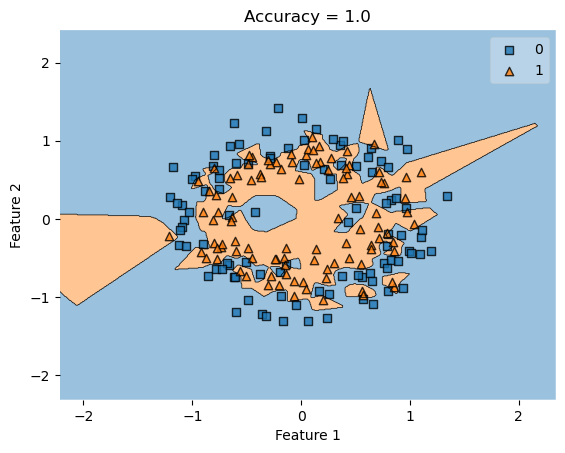

In [39]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 500)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

##### noise = 0.8

0.5


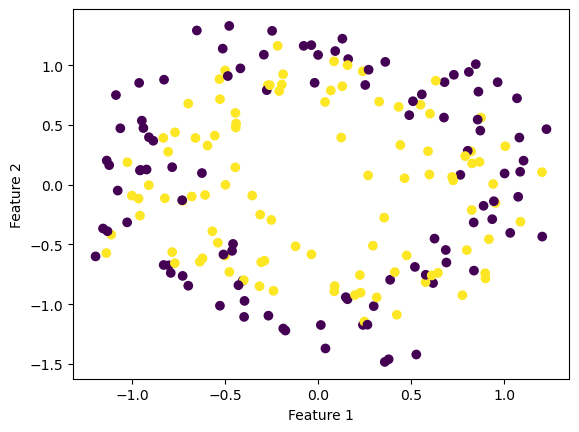

In [40]:
X, y = make_circles(200, shuffle = True, noise = 0.2)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")
KLR = KernelLogisticRegression(rbf_kernel, gamma = .2)
KLR.fit(X, y)
print(KLR.score(X, y))

0.99


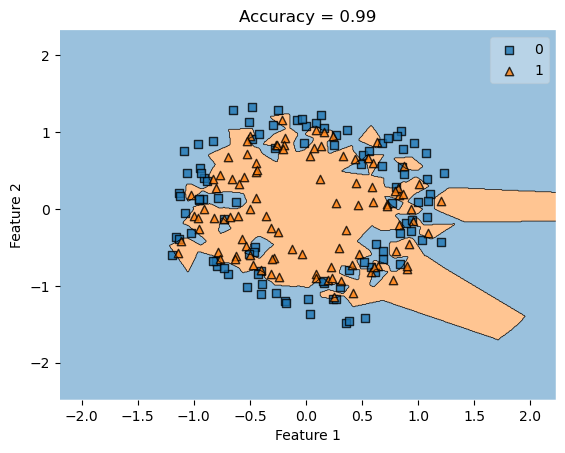

In [41]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 500)
KLR.fit(X, y, max_epochs = 10000, alpha = 1)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

From the experiment on make_circles, it seems that when noise gets higher, the data spreads more, so when we try to fit the model, it is hard for us to get high accuracy if we are having a low gamma value. I think from all the experiments I made about make_circles, the one with noise = 0.05 and gamma = 500 matches is a pretty good prediction, as it is not too detailed (overfitting) and still has high accuracy.